In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [7]:
import pandas as pd
pd.DataFrame(X,columns=iris.feature_names[:2])

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()     #Instantiate tree with default parameters
dtc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6888888888888889

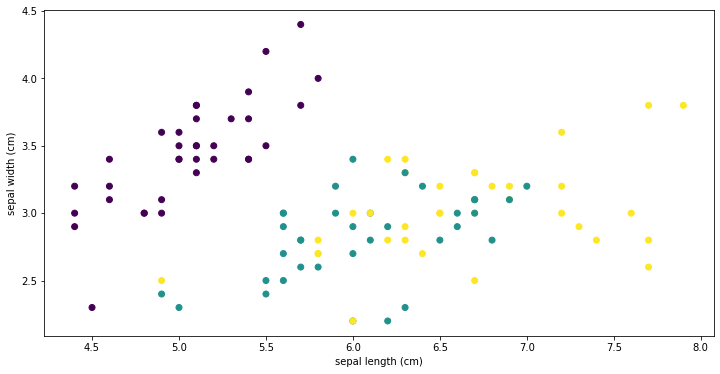

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=((12,6)))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'], 'max_depth' : [3,5,7,20]}

gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20]})

In [10]:
from sklearn.metrics import accuracy_score

y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.6666666666666666

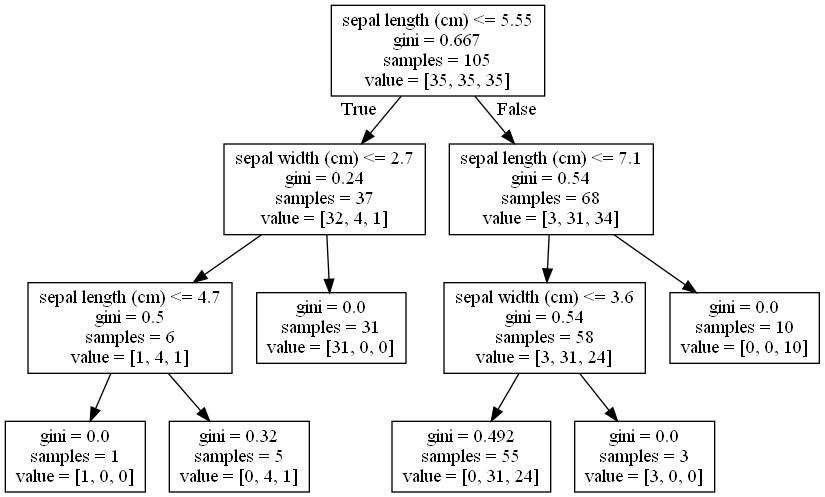

In [14]:
import numpy as np
from sklearn import tree
#from sklearn.externals.six import StringIO
from six import StringIO

import pydot
from IPython.display import Image

dot_iris = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_iris, feature_names = iris.feature_names[:2])

#graph = pydot.graph_from_dot_data(dot_iris.getvalue())
graph, = pydot.graph_from_dot_data(dot_iris.getvalue())

Image(graph.create_png())

Text(0, 0.5, 'sepal width (cm)')

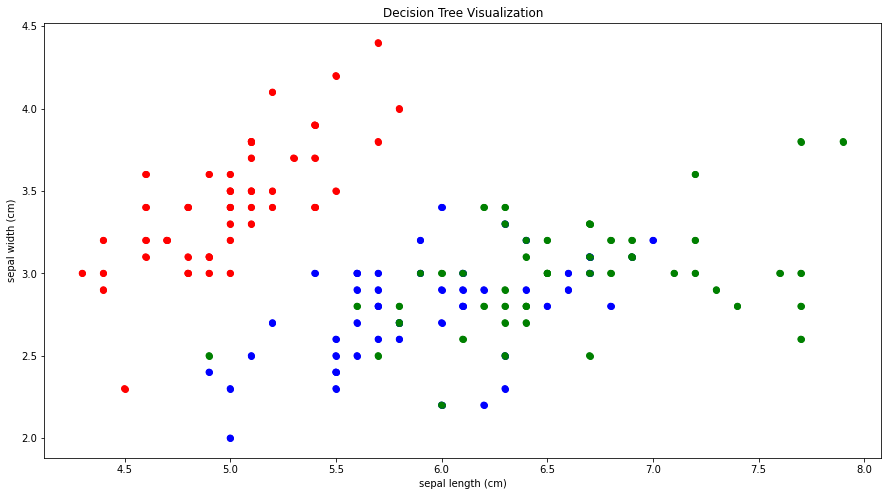

In [23]:
grid_interval = 0.02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

xmin_plot, xmax_plot = xmin - .5, xmax + .5
ymin_plot, ymax_plot = ymin - .5, ymax + .5

xx, yy = np.meshgrid(np.arange(xmin_plot, xmax_plot, grid_interval),
np.arange(ymin_plot, ymax_plot, grid_interval))

import matplotlib.pyplot as plt
%matplotlib inline

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

test_preds = gs_inst.best_estimator_.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

colors = np.array(['r', 'b','g'])

#plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds], alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

Text(0, 0.5, 'sepal width (cm)')

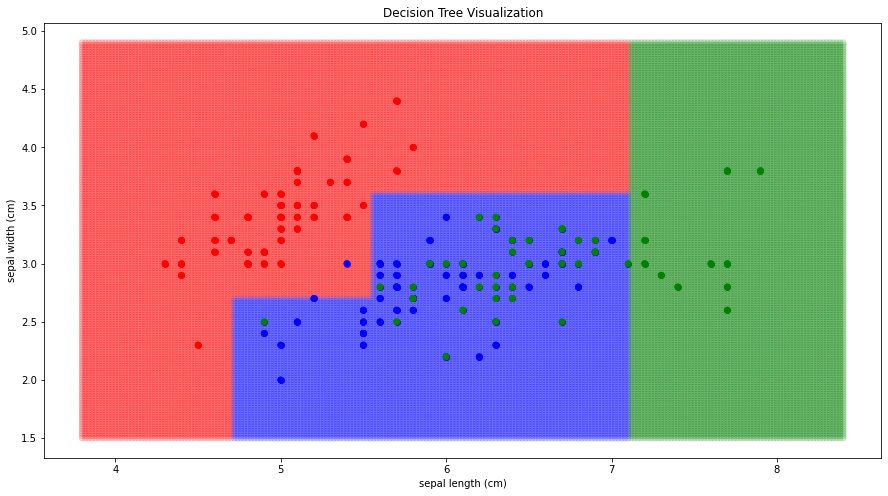

In [25]:
plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds], alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])